# Expected Value of Craps

## Craps Rules
Players bet on the outcome of the roll(s) of __two six-sided dice__. The main action centers around a bet called the __Pass Line__ or __Don't Pass Line__, depending on whether you're betting __with__ or __against__ the shooter (the person rolling the dice).

### Caome-Out Roll
- The first roll of a new round is called the __come-out roll__.
- Players must place a bet on either __Pass Line__ (betting __with__ the shooter) or __Don't Pass Line__ (betting __against__ the shooter).

### Outcomes of the Come-Out Roll:
Roll Total  |Pass Line         |Don't Pass Line                |
------------|------------------|-------------------------------|
7 or 11     |Win               |Lose                           |
2, 3, or 12 |Lose              |Win on 2 or 3; Push on 12 (tie)|
4,5,6,8,9,10|Becomes the Point |                               |

### Point Phase
- If the shooter rolls a __Point__, it is "established."
- The shooter keeps rolling the dice until one of two things happen:
  - They roll the __Point number again__ -> __Pass Line wins, Don't Pass loses__
  - They roll a __7 before the Point__ -> __Pass Line loses, Don't Pass wins__ (this is called "seven-out")
 
### Common Bets:
Bet Type        |When to Bet                          |How It Wins                                                                        |
----------------|-------------------------------------|-----------------------------------------------------------------------------------|
Pass Line       |Before come-out                      |Wins on 7 or 11; Wins if Point is made again                                       |
Don't Pass      |Before come-out                      |Wins on 2 or 3; Pushes on 12; Wins if 7 comes before Point                         |
Come            |After come-out                       |Like a new Pass Line bet starting on next roll                                     |
Don't Come      |After come-out                       |Like a new Don't Pass bet starting on next roll                                    |
Odds            |After Point is Set                   |Additional bet backing Pass/Don't Pass at true odds (no house edge)                |             
Place Bets      |Any time after come-out              |Bet a number will be rolled before a 7                                             |
Buy Bets        |Like Place Bets but with a commission|Better payout than Place but with house edge via fee                               |
Field           |One-roll bet                         |Wins on 2, 3, 4, 9, 10, 11, 12                                                     |
Hardways        |Any time                             |Wins if a number is rolled "the hard way" (e.g., 2+2=4) before it's rolled "the easy way" (e.g., 1+3=4) or a 7 |

## Sum fo Rolling Two Dice

In [1]:
import pandas as pd
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

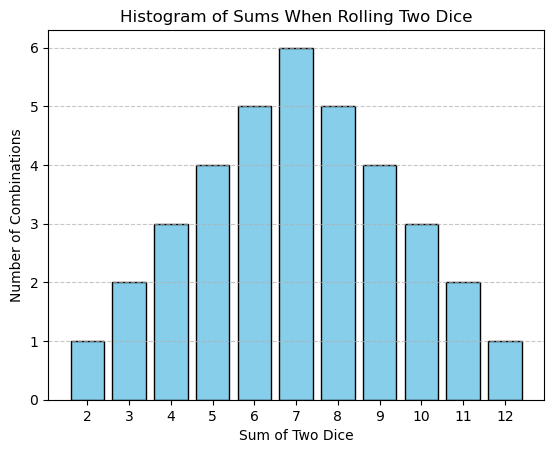

In [2]:
# All possible combinations of 2 dice (1–6)
combinations = list(itertools.product(range(1, 7), repeat=2))

# Calculate the sum for each combination
sums = [sum(pair) for pair in combinations]

# Count how often each sum occurs
sum_counts = Counter(sums)

# Plotting the histogram
plt.bar(sum_counts.keys(), sum_counts.values(), color='skyblue', edgecolor='black')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Number of Combinations')
plt.title('Histogram of Sums When Rolling Two Dice')
plt.xticks(range(2, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [3]:
freq = pd.DataFrame(sum_counts.items(), columns=['Sum', 'Frequency'])

In [4]:
total_combos = freq['Frequency'].sum()
total_combos

36

In [5]:
freq_prob = freq.assign(Probability = freq['Frequency'] / total_combos).set_index('Sum')
freq_prob

,Frequency,Probability
Sum,,
2,1,0.027778
3,2,0.055556
4,3,0.083333
5,4,0.111111
6,5,0.138889
7,6,0.166667
8,5,0.138889
9,4,0.111111
10,3,0.083333


In [6]:
def return_table(payout: int, target_number: int, bet_type: str) -> pd.DataFrame:
    # To accept lowercase
    bet_type = bet_type.title()

    # Validate input
    if bet_type not in ['Pass', 'Dont', 'Hard Way', 'Place', 'Buy', 'Easy Hops', 'Hard Hops', 'Any Seven', 'Any Craps']:
        return "Invalid bet type. Please enter either 'Pass,''Dont,' 'Hard Way,' 'Place,' 'Buy,' 'Easy Hops,' 'Hard Hops,' 'Any Seven,' or 'Any Craps.' "

    if bet_type in ['Pass', 'Place', 'Buy']:
        win_combos = sum_counts[target_number]
        loss_combos = sum_counts[7]
    elif bet_type == 'Dont':
        win_combos = sum_counts[7]
        loss_combos = sum_counts[target_number]
    elif bet_type == 'Hard Way':
        win_combos = 1
        loss_combos = sum_counts[7] + sum_counts[target_number] - 1
    elif bet_type == 'Easy Hops':
        win_combos = 2
        loss_combos = total_combos - 2
    elif bet_type == 'Hard Hops':
        win_combos = 1
        loss_combos = total_combos - 1
    elif bet_type == 'Any Seven':
        win_combos = 6
        loss_combos = total_combos - 6
    else: # bet_type == 'Any Craps'
        win_combos = sum_counts[2] + sum_counts[3] + sum_counts[12]
        loss_combos = total_combos - (sum_counts[2] + sum_counts[3] + sum_counts[12])
        
    total = win_combos + loss_combos

    # Probabilities
    p_win = win_combos / total
    p_loss = loss_combos / total

    # Returns
    win_return = round(payout * p_win, 3)
    loss_return = round(-1 * p_loss, 3)
    total_return = round(win_return + loss_return, 3)

    # Construct DataFrame
    data = {
        "Payout": [payout, -1, ""],
        "Combinations": [win_combos, loss_combos, total],
        "Probability": [p_win, p_loss, 1],
        "Return (EV)": [win_return, loss_return, total_return]
    }

    df = pd.DataFrame(data, index=["Win", "Loss", "Total"])
    return df

## Expected Return of Pass Line Bet

In [7]:
# Probabilities of come-out results
come_out_win = sum_counts[7] + sum_counts[11]   # 6 + 2 = 8
come_out_loss = sum_counts[2] + sum_counts[3] + sum_counts[12]  # 1 + 2 + 1 = 4

# Probabilities of each point being established
points = [4, 5, 6, 8, 9, 10]
point_probs = {pt: sum_counts[pt] / total_combos for pt in points}

results = []

# Come-out outcomes
results.append({
    'Outcome': 'Come Out Win',
    'Payout': 1,
    'Probability': (come_out_win / total_combos),
    'Return (EV)': 1 * (come_out_win / total_combos)
})
results.append({
    'Outcome': 'Come Out Loss',
    'Payout': -1,
    'Probability': (come_out_loss / total_combos),
    'Return (EV)': -1 * (come_out_loss / total_combos)
})

# Point outcomes
for pt in points:
    pt_combos = sum_counts[pt]
    p_point_set = pt_combos / total_combos
    p_win_after_point = pt_combos / (pt_combos + sum_counts[7])
    p_loss_after_point = sum_counts[7] / (pt_combos + sum_counts[7])

    results.append({
        'Outcome': f'Point {pt} Win',
        'Payout': 1,
        'Probability': p_point_set * p_win_after_point,
        'Return (EV)': 1 * (p_point_set * p_win_after_point)
    })
    results.append({
        'Outcome': f'Point {pt} Loss',
        'Payout': -1,
        'Probability': p_point_set * p_loss_after_point,
        'Return (EV)': -1 * (p_point_set * p_loss_after_point)
    })

pass_df = pd.DataFrame(results)
pass_df['Return (EV)'] = pass_df['Return (EV)']#.round(3)
pass_df = pass_df.set_index('Outcome').sort_values('Payout', ascending=False)
# df['%'] = (df['Probability'] * 100).round(2)

pass_df

,Payout,Probability,Return (EV)
Outcome,,,
Come Out Win,1,0.222222,0.222222
Point 4 Win,1,0.027778,0.027778
Point 5 Win,1,0.044444,0.044444
Point 6 Win,1,0.063131,0.063131
Point 8 Win,1,0.063131,0.063131
Point 9 Win,1,0.044444,0.044444
Point 10 Win,1,0.027778,0.027778
Come Out Loss,-1,0.111111,-0.111111
Point 4 Loss,-1,0.055556,-0.055556


In [8]:
pass_df['Return (EV)'].sum().round(4)

-0.0141

In [9]:
# Prob of winning a Pass bet
pass_df.loc[pass_df['Payout']==1, 'Probability'].sum()

0.492929292929293

The expected return of the Pass bet is -0.0141. This is the house advantage: for every dollar you bet on the Pass line, you can expect to lose 1.41 cents over the long run. The probability of winning the Pass Line bet is 49.29%.

## Expected Return of Taking Odds Bet (Pass Line)

### Odds on 4 and 10 (2:1)

In [10]:
return_table(2, 4, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,2,3,0.333333,0.667
Loss,-1,6,0.666667,-0.667
Total,,9,1.000000,0.000


In [11]:
return_table(2, 10, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,2,3,0.333333,0.667
Loss,-1,6,0.666667,-0.667
Total,,9,1.000000,0.000


### Odds on 5 and 9 (3:2)

In [12]:
return_table(1.5, 5, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,1.5,4,0.4,0.6
Loss,-1,6,0.6,-0.6
Total,,10,1.0,0.0


In [13]:
return_table(1.5, 9, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,1.5,4,0.4,0.6
Loss,-1,6,0.6,-0.6
Total,,10,1.0,0.0


### Odds on 6 and 8 (6:5)

In [14]:
return_table(1.2, 6, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,1.2,5,0.454545,0.545
Loss,-1,6,0.545455,-0.545
Total,,11,1.000000,0.000


In [15]:
return_table(1.2, 8, 'Pass')

,Payout,Combinations,Probability,Return (EV)
Win,1.2,5,0.454545,0.545
Loss,-1,6,0.545455,-0.545
Total,,11,1.000000,0.000


__The expected value is exactly 0!__ This means there is no house advantage and no player advantage — it's a perfectly fair bet. That's why many people recommend making it. The alternative is placing bets that have a built-in house edge.

## Expected Value of Don't Pass Bet

In [16]:
# Probabilities of come-out results
come_out_win = sum_counts[2] + sum_counts[3]   # 1 + 2 = 3
come_out_loss = sum_counts[7] + sum_counts[11]  # 6 + 2 = 8
come_out_push = sum_counts[12]

# Probabilities of each point being established
points = [4, 5, 6, 8, 9, 10]
point_probs = {pt: sum_counts[pt] / total_combos for pt in points}

results = []

# Come-out outcomes
results.append({
    'Outcome': 'Come Out Win',
    'Payout': 1,
    'Probability': (come_out_win / total_combos),
    'Return (EV)': 1 * (come_out_win / total_combos)
})
results.append({
    'Outcome': 'Come Out Loss',
    'Payout': -1,
    'Probability': (come_out_loss / total_combos),
    'Return (EV)': -1 * (come_out_loss / total_combos)
})
results.append({
    'Outcome': 'Come Out Push',
    'Payout': 0,
    'Probability': (come_out_push / total_combos),
    'Return (EV)': 0 * (come_out_push / total_combos)
})

# Point outcomes
for pt in points:
    pt_combos = sum_counts[pt]
    p_point_set = pt_combos / total_combos
    p_win_after_point = sum_counts[7] / (pt_combos + sum_counts[7])
    p_loss_after_point = pt_combos / (pt_combos + sum_counts[7])

    results.append({
        'Outcome': f'Point {pt} Win',
        'Payout': 1,
        'Probability': p_point_set * p_win_after_point,
        'Return (EV)': 1 * (p_point_set * p_win_after_point)
    })
    results.append({
        'Outcome': f'Point {pt} Loss',
        'Payout': -1,
        'Probability': p_point_set * p_loss_after_point,
        'Return (EV)': -1 * (p_point_set * p_loss_after_point)
    })

dont_df = pd.DataFrame(results)
dont_df['Return (EV)'] = dont_df['Return (EV)']#.round(3)
dont_df = dont_df.set_index('Outcome').sort_values('Payout', ascending=False)
# df['%'] = (df['Probability'] * 100).round(2)

dont_df

,Payout,Probability,Return (EV)
Outcome,,,
Come Out Win,1,0.083333,0.083333
Point 4 Win,1,0.055556,0.055556
Point 5 Win,1,0.066667,0.066667
Point 6 Win,1,0.075758,0.075758
Point 8 Win,1,0.075758,0.075758
Point 9 Win,1,0.066667,0.066667
Point 10 Win,1,0.055556,0.055556
Come Out Push,0,0.027778,0.000000
Come Out Loss,-1,0.222222,-0.222222


## Expected Return of Laying Odds Bet (Don't Pass Line)

### Odds on 4 and 10 (1:2)

In [17]:
return_table(0.5, 4, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.5,6,0.666667,0.333
Loss,-1,3,0.333333,-0.333
Total,,9,1.000000,0.000


In [18]:
return_table(0.5, 10, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.5,6,0.666667,0.333
Loss,-1,3,0.333333,-0.333
Total,,9,1.000000,0.000


### Odds on 5 and 9 (2:3)

In [19]:
return_table(0.666667, 5, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.666667,6,0.6,0.4
Loss,-1,4,0.4,-0.4
Total,,10,1.0,0.0


In [20]:
return_table(0.666667, 9, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.666667,6,0.6,0.4
Loss,-1,4,0.4,-0.4
Total,,10,1.0,0.0


### Odds on 6 and 8 (5:6)

In [21]:
return_table(0.833333, 6, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.833333,6,0.545455,0.455
Loss,-1,5,0.454545,-0.455
Total,,11,1.000000,0.000


In [22]:
return_table(0.833333, 8, 'Dont')

,Payout,Combinations,Probability,Return (EV)
Win,0.833333,6,0.545455,0.455
Loss,-1,5,0.454545,-0.455
Total,,11,1.000000,0.000


In [23]:
dont_df['Return (EV)'].sum().round(4)

-0.0136

In [24]:
# Prob of winning a Don't Pass bet
dont_df.loc[dont_df['Payout']==1, 'Probability'].sum()

0.4792929292929292

The expected return of the Don't Pass bet is -0.0136. This is the house advantage: for every dollar you bet on the Pass line, you can expect to lose 1.36 cents over the long run. This indicates that odds are a hair better on the Don't Pass bet than the Pass Line bet by 0.05 cents.

If you must play completely by the math, then you should be making the Don't Pass bet. But it's only a 0.05% difference, and most players find it more fun to bet on the Pass side because it feels like team betting and you are cheering with the shooter and other players. Most people naturally root for the dice to win, not lose.

In [25]:
come_out_summary = (pd.merge(left = dont_df, 
                            right = pass_df, 
                            how="left", 
                            left_on=dont_df.index, 
                            right_on=pass_df.index
                           )[['key_0', 'Return (EV)_x', 'Return (EV)_y', 'Probability_x', 'Probability_y']]
                    .rename(columns={'key_0': 'Outcome', 
                                     'Return (EV)_x': "EV - Don't Pass", 
                                     'Return (EV)_y': "EV - Pass Line",
                                     'Probability_x': "Prob - Don't Pass",
                                     'Probability_y': "Prob - Pass Line"}
                           )
                   )

come_out_summary

,Outcome,EV - Don't Pass,EV - Pass Line,Prob - Don't Pass,Prob - Pass Line
0,Come Out Win,0.083333,0.222222,0.083333,0.222222
1,Point 4 Win,0.055556,0.027778,0.055556,0.027778
2,Point 5 Win,0.066667,0.044444,0.066667,0.044444
3,Point 6 Win,0.075758,0.063131,0.075758,0.063131
4,Point 8 Win,0.075758,0.063131,0.075758,0.063131
5,Point 9 Win,0.066667,0.044444,0.066667,0.044444
6,Point 10 Win,0.055556,0.027778,0.055556,0.027778
7,Come Out Push,0.000000,NaN,0.027778,NaN
8,Come Out Loss,-0.222222,-0.111111,0.222222,0.111111
9,Point 4 Loss,-0.027778,-0.055556,0.027778,0.055556


In [26]:
come_out_summary.sum()

Outcome              Come Out WinPoint 4 WinPoint 5 WinPoint 6 WinP...
EV - Don't Pass                                              -0.013636
EV - Pass Line                                               -0.014141
Prob - Don't Pass                                                  1.0
Prob - Pass Line                                                   1.0
dtype: object

## Expected Value of Buy/Place Bets

### Buy on 4 and 10 (1.95:1)

In [27]:
return_table(1.95, 4, 'Buy')

,Payout,Combinations,Probability,Return (EV)
Win,1.95,3,0.333333,0.650
Loss,-1,6,0.666667,-0.667
Total,,9,1.000000,-0.017


In [28]:
return_table(1.95, 10, 'Buy')

,Payout,Combinations,Probability,Return (EV)
Win,1.95,3,0.333333,0.650
Loss,-1,6,0.666667,-0.667
Total,,9,1.000000,-0.017


Don't place a buy bet if the commisiion is paid all the time as it will increase the house edge significantly.

### Place on 5 and 9 (7:5)

In [29]:
return_table(1.4, 5, 'Place')

,Payout,Combinations,Probability,Return (EV)
Win,1.4,4,0.4,0.56
Loss,-1,6,0.6,-0.60
Total,,10,1.0,-0.04


In [30]:
return_table(1.4, 9, 'Place')

,Payout,Combinations,Probability,Return (EV)
Win,1.4,4,0.4,0.56
Loss,-1,6,0.6,-0.60
Total,,10,1.0,-0.04


### Place on 6 and 8 (7:6)

In [31]:
return_table(1.166667, 6, 'Place')

,Payout,Combinations,Probability,Return (EV)
Win,1.166667,5,0.454545,0.530
Loss,-1,6,0.545455,-0.545
Total,,11,1.000000,-0.015


In [32]:
return_table(1.166667, 8, 'Place')

,Payout,Combinations,Probability,Return (EV)
Win,1.166667,5,0.454545,0.530
Loss,-1,6,0.545455,-0.545
Total,,11,1.000000,-0.015


## Expected Value of Hard Way Bets

### Hard Way on 4 and 10 (7:1)

In [33]:
return_table(7, 4, 'Hard Way')

,Payout,Combinations,Probability,Return (EV)
Win,7,1,0.111111,0.778
Loss,-1,8,0.888889,-0.889
Total,,9,1.000000,-0.111


In [34]:
return_table(7, 10, 'Hard Way')

,Payout,Combinations,Probability,Return (EV)
Win,7,1,0.111111,0.778
Loss,-1,8,0.888889,-0.889
Total,,9,1.000000,-0.111


### Hard Way on 6 and 8 (9:1)

In [35]:
return_table(9, 6, 'Hard Way')

,Payout,Combinations,Probability,Return (EV)
Win,9,1,0.090909,0.818
Loss,-1,10,0.909091,-0.909
Total,,11,1.000000,-0.091


In [36]:
return_table(9, 8, 'Hard Way')

,Payout,Combinations,Probability,Return (EV)
Win,9,1,0.090909,0.818
Loss,-1,10,0.909091,-0.909
Total,,11,1.000000,-0.091


## Expected Value of Other Bets

### Easy Hops (15:1)

In [37]:
return_table(15, 8, 'Easy Hops')

,Payout,Combinations,Probability,Return (EV)
Win,15,2,0.055556,0.833
Loss,-1,34,0.944444,-0.944
Total,,36,1.000000,-0.111


### Hard Hops (30:1)

In [38]:
return_table(30, 2, 'Hard Hops')

,Payout,Combinations,Probability,Return (EV)
Win,30,1,0.027778,0.833
Loss,-1,35,0.972222,-0.972
Total,,36,1.000000,-0.139


### Any Seven Bet (4:1)

In [39]:
return_table(4, 7, 'Any Seven')

,Payout,Combinations,Probability,Return (EV)
Win,4,6,0.166667,0.667
Loss,-1,30,0.833333,-0.833
Total,,36,1.000000,-0.166


### Any Craps Bet (7:1)

In [40]:
return_table(7, 2, 'Any Craps')

,Payout,Combinations,Probability,Return (EV)
Win,7,4,0.111111,0.778
Loss,-1,32,0.888889,-0.889
Total,,36,1.000000,-0.111


### Field Bet

In [41]:
win_combos_12_field = sum_counts[12]
win_combos_2_field = sum_counts[2]
win_combos_3_4_9_10_11_field = sum_counts[3] + sum_counts[4] + sum_counts[9] + sum_counts[10] + sum_counts[11]
loss_combos = total_combos - (win_combos_12_field + win_combos_2_field + win_combos_3_4_9_10_11_field)
    
total = win_combos_12_field + win_combos_2_field + win_combos_3_4_9_10_11_field + loss_combos

# Probabilities
p_win_12_field = win_combos_12_field / total
p_win_2_field = win_combos_2_field / total
p_win_3_4_9_10_11_field = win_combos_3_4_9_10_11_field / total
p_loss = loss_combos / total

# Returns
win_return_12_field = round(3 * p_win_12_field, 3)
win_return_2_field = round(2 * p_win_2_field, 3)
win_return_3_4_9_10_11_field = round(1 * p_win_3_4_9_10_11_field, 3)
loss_return = round(-1 * p_loss, 3)
total_return = round(win_return_12_field + win_return_2_field + win_return_3_4_9_10_11_field + loss_return, 3)

# Construct DataFrame
data = {
    "Payout": [3, 2, 1, -1, ""],
    "Combinations": [win_combos_12_field, win_combos_2_field, win_combos_3_4_9_10_11_field, loss_combos, total],
    "Probability": [p_win_12_field, p_win_2_field, p_win_3_4_9_10_11_field, p_loss, 1],
    "Return (EV)": [win_return_12_field, win_return_2_field, win_return_3_4_9_10_11_field, loss_return, total_return]
}

df = pd.DataFrame(data, index=["12", "2", "3,4,9,10,11", "Loss (5,6,7,8)", "Total"])
df

,Payout,Combinations,Probability,Return (EV)
12,3,1,0.027778,0.083
2,2,1,0.027778,0.056
"3,4,9,10,11",1,14,0.388889,0.389
"Loss (5,6,7,8)",-1,20,0.555556,-0.556
Total,,36,1.000000,-0.028


Some casinos only pay 2:1 for 12 field bet. If so, the house edge will double, so if you like the field bet, make sure to play where 12 field bet payout is 3:1!

## Summary

Based on __expected values__, the __mathematical advice__ for Craps players is:
- During the come-out phase, bet on the __Don't Pass Line__ if you are strictly following the math. But many players prefer the __Pass Line__ because it feels more engaging to bet _with_ the shooter. The EV of the Don't Pass Line is only about 0.05% better than the Pass Line.
- __Take advantage of Odds bets__. They have 0% __house edge__.
- If you want to make additional bets, go for __Place 6 or 8__ or __Buy 4 or 8__, as these have relatively low house edges. When placing __Buy bets__, ensure the __5% commission is charged only on a win__.